# **Drug Classification With Machine Learning Algorithm**

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Drug Classification with Different Machine Learning Algorithms/drug200.csv')

Mounted at /content/drive


### **Data Cleaning**

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
data.shape

(200, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


### **Data Visualization**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


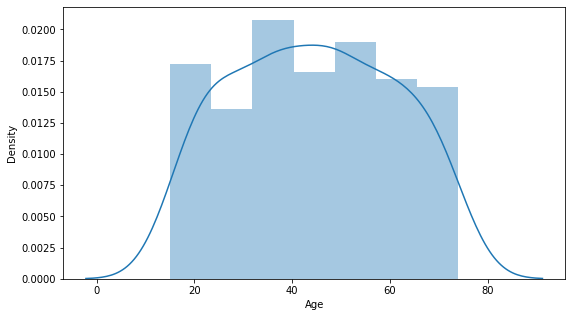

In [9]:
# Age distribution
plt.figure(figsize = (9,5))
sns.distplot(data.Age)
plt.show()

In [12]:
data['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


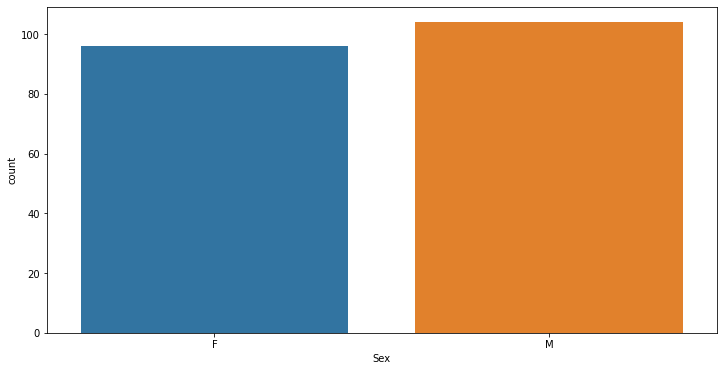

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(data.Sex)
plt.show()

In [16]:
data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


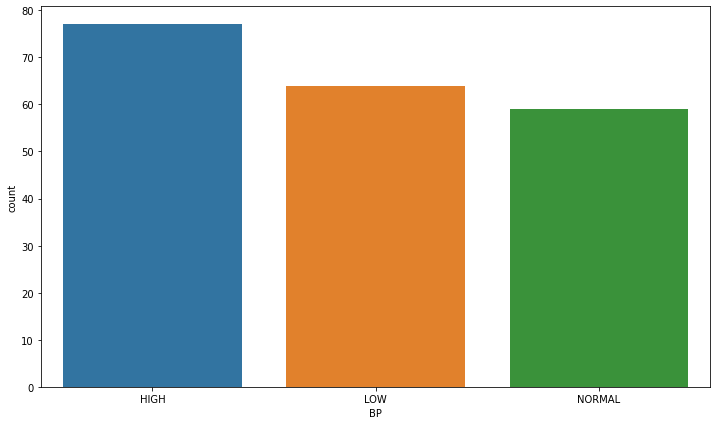

In [17]:
plt.figure(figsize=(12,7))
sns.countplot(data.BP)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


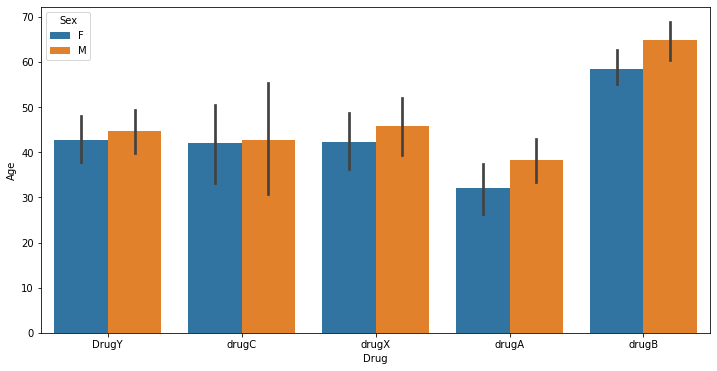

In [26]:
plt.figure(figsize=(12,6))
sns.barplot('Drug','Age',data=data,hue='Sex')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


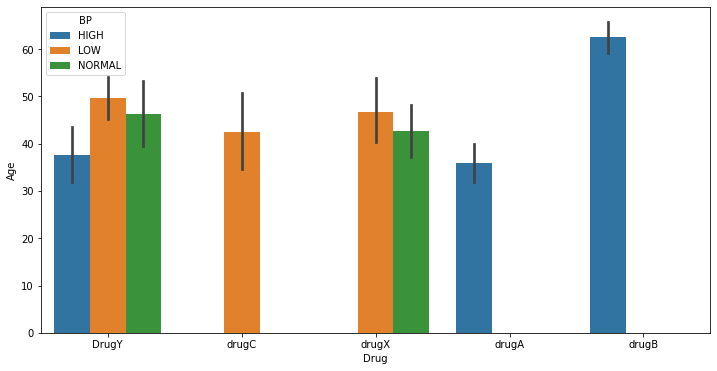

In [27]:
plt.figure(figsize=(12,6))
sns.barplot('Drug','Age',data=data,hue='BP')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


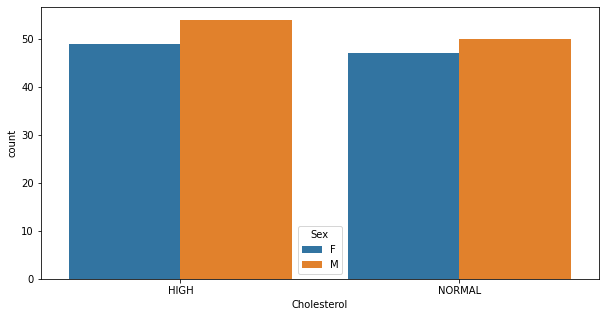

In [30]:
plt.figure(figsize=(10,5))
sns.countplot('Cholesterol',hue='Sex',data=data)
plt.show()

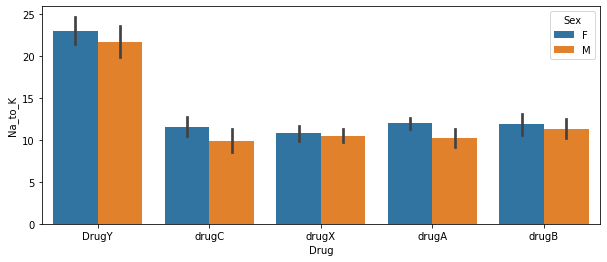

In [31]:
plt.figure(figsize=(10,4))
sns.barplot(x='Drug',y='Na_to_K',hue='Sex',data=data)
plt.show()

### **Label Encoding**

In [48]:
from sklearn.preprocessing import LabelEncoder
s=LabelEncoder()
data['Sex']=s.fit_transform(data['Sex'])
data['BP']=s.fit_transform(data['BP'])
data['Cholesterol']=s.fit_transform(data['Cholesterol'])
data['Drug']=s.fit_transform(data['Drug'])
data['Na_to_K']=s.fit_transform(data['Na_to_K'])

In [49]:
data['Sex'].value_counts()

1    104
0     96
Name: Sex, dtype: int64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          200 non-null    int64
 1   Sex          200 non-null    int64
 2   BP           200 non-null    int64
 3   Cholesterol  200 non-null    int64
 4   Na_to_K      200 non-null    int64
 5   Drug         200 non-null    int64
dtypes: int64(6)
memory usage: 9.5 KB


In [59]:
x = data.drop(["Drug"],axis=1)
y = data.Drug

In [61]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,167
1,47,1,1,0,89
2,47,1,1,0,43
3,28,0,2,0,10
4,61,0,1,0,133


### **Splitting Train Dataset and Test Dataset**

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=42)

### **KNN Classifier**

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [67]:
knn_test=knn.predict(X_test)
knn_test

array([1, 0, 4, 3, 0, 0, 0, 1, 4, 4, 1, 1, 0, 4, 2, 0, 2, 4, 1, 0, 4, 2,
       1, 0, 0, 0, 1, 1, 0, 4, 0, 4, 0, 0, 4, 0, 2, 1, 0, 1, 1, 4, 4, 0,
       0, 2, 0, 0, 0, 2])

In [68]:
accuracy_score(Y_test,knn_test)*100

64.0

### **Random Forest Classifier**

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [70]:
rfc_test=rfc.predict(X_test)
rfc_test

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1, 4, 4, 4, 0,
       0, 3, 0, 0, 0, 4])

In [71]:
accuracy_score(Y_test,rfc_test)*100

100.0

### **Decision Tree Classifier**

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion = "entropy",random_state=20)
dt.fit(X_train,Y_train)
dt_pred=dt.predict(X_test)
dt_pred

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1, 4, 4, 4, 0,
       0, 3, 0, 0, 0, 4])

In [73]:
accuracy_score(Y_test,dt_pred)*100

100.0

### **Support Vector Classifier**

In [75]:
from sklearn.svm import SVC
svc=SVC().fit(X_train,Y_train)

In [76]:
svc_test=svc.predict(X_test)
svc_test

array([4, 0, 4, 4, 0, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 0, 4, 4,
       4, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 0, 4, 0, 4, 4, 0, 4, 4, 4, 4, 0,
       0, 4, 0, 0, 0, 4])

In [77]:
accuracy_score(Y_test,svc_test)*100

70.0